<a href="https://colab.research.google.com/github/vmpreciado/NETS3120/blob/main/CentralitiesZachary2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Notebook, we continue or analysis and comparison of various centralities using the Zachary's network. We start by loading the network in a graph object.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Load Zachary's Karate Club graph
G = nx.karate_club_graph()

# Get positions for the nodes in the graph
pos = nx.spring_layout(G)

Let's define, again, a function to draw the graph with nodes colored and sized according to their centrality values.

In [2]:
def draw_graph_with_centrality(G, node_values, title, pos):
    # Calculate the sum of the node_values
    total_sum = sum(node_values.values())

    # Normalize node values so that the sum of entries is equal to one
    node_values_normalized = {node: value / total_sum for node, value in node_values.items()}

    # Adjust the normalized values for color and size mapping
    # Multiplying by a constant for visualization purposes
    node_values_for_visualization = [v * 5000 for v in node_values_normalized.values()]

    plt.figure(figsize=(12, 10))
    nx.draw(G, pos, with_labels=True, node_color=node_values_for_visualization,
            node_size=node_values_for_visualization, cmap=plt.cm.viridis)
    plt.title(title)
    plt.show()

Let's start by computing the eigenvector centralities...

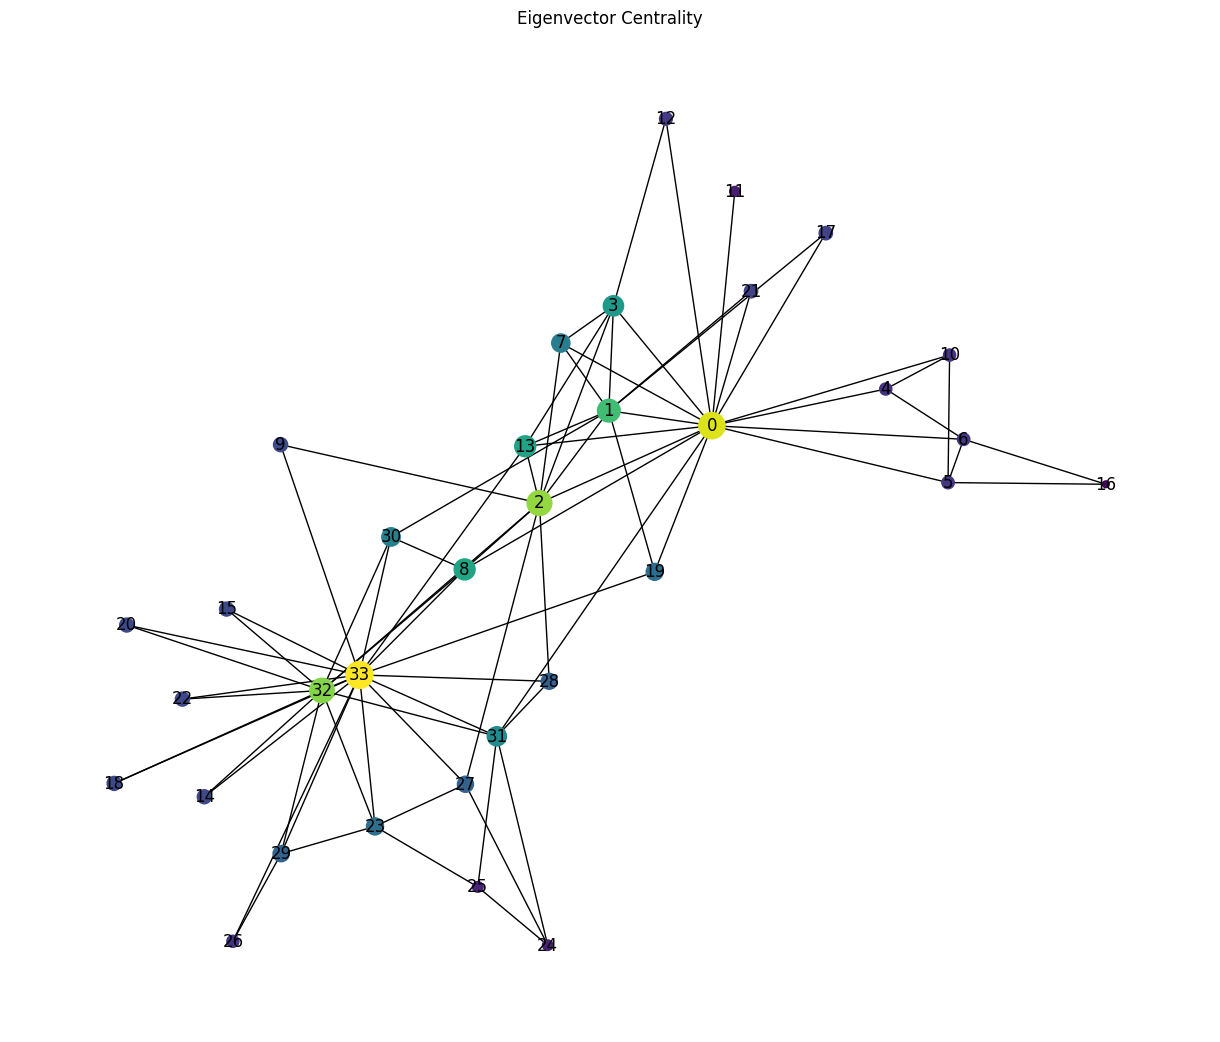

In [3]:
# Compute and plot eigenvector centralities
eigenvector_centralities = nx.eigenvector_centrality(G)
draw_graph_with_centrality(G, eigenvector_centralities, 'Eigenvector Centrality', pos)

Let's move on to computing and plotting the Katz centralities of all the nodes...

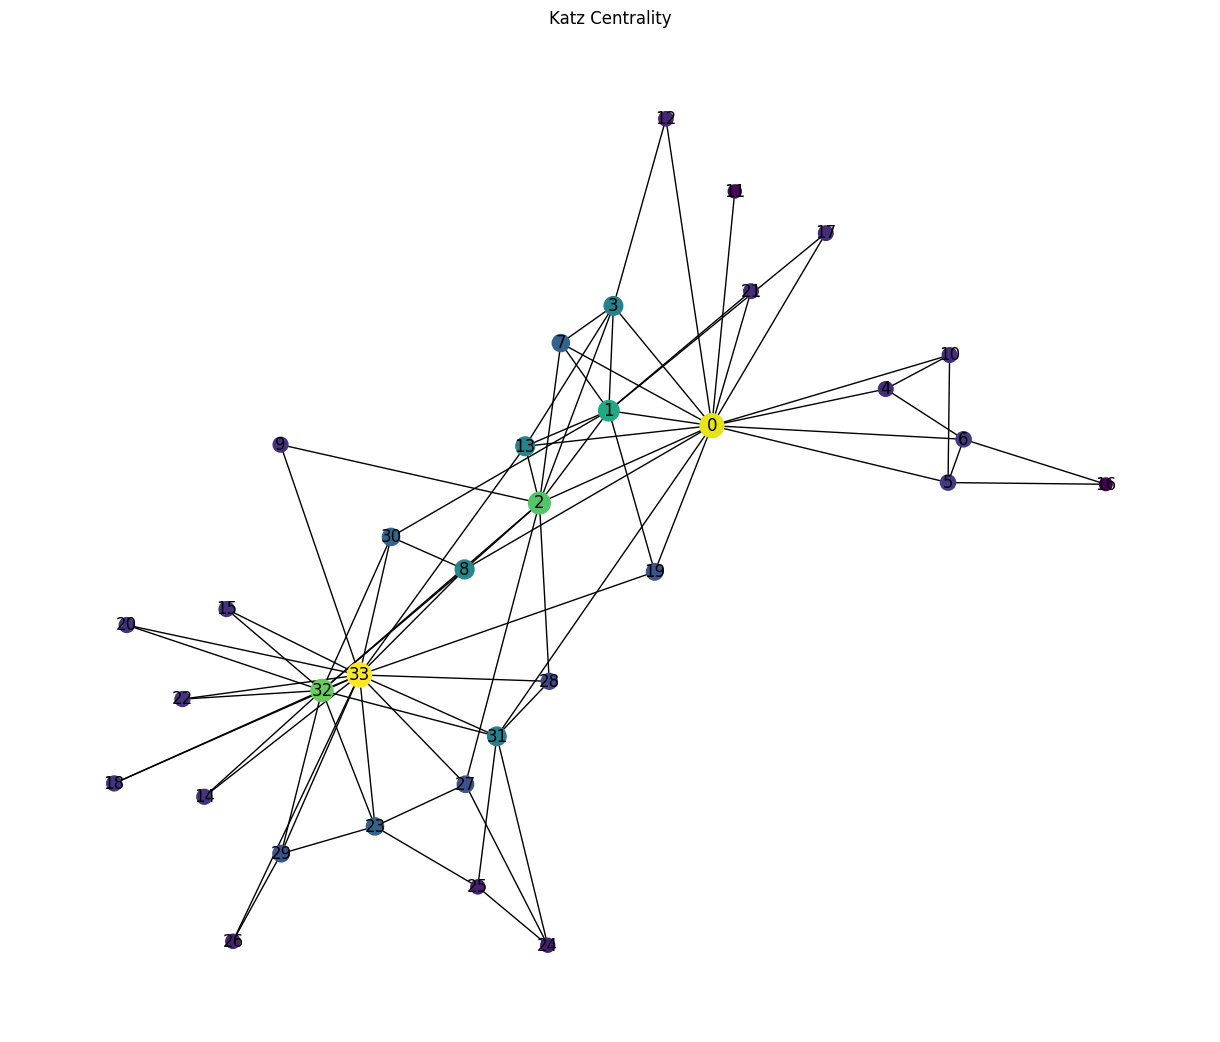

In [4]:
# Compute Katz centralities
# alpha is a hyperparameter (called 'attenuation' factor)
# You can optionally specify a 'beta' value, (default is 1.0 for all nodes).
alpha = 0.1
katz_centralities = nx.katz_centrality(G, alpha=alpha)
draw_graph_with_centrality(G, katz_centralities, 'Katz Centrality', pos)

Let's move on to the PageRank centralities...

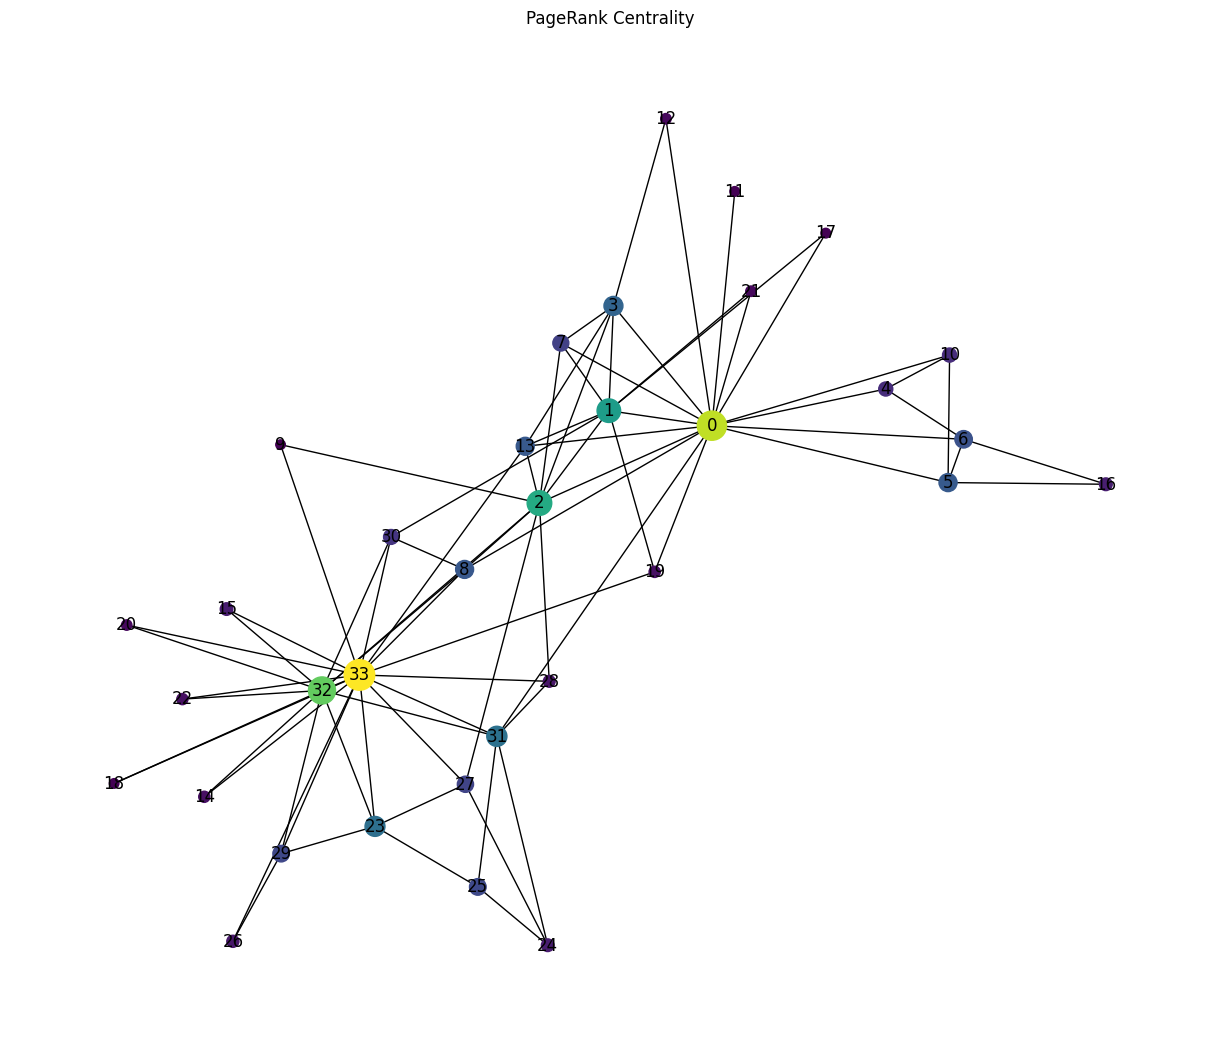

In [5]:
# Compute PageRank centralities
pagerank_centralities = nx.pagerank(G, alpha=0.85)  # alpha is the damping parameter
draw_graph_with_centrality(G, pagerank_centralities, 'PageRank Centrality', pos)